In [ ]:
import wave

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [12]:
obj = wave.open("/content/drive/MyDrive/Colab Notebooks/sip_lab2.wav", "rb")

In [20]:
print("No. of channels", obj.getnchannels())
print("Sample width", obj.getsampwidth())
print("Frame rate", obj.getframerate())   # 44.1kHz  sample freq
print("No. of frames", obj.getnframes())
print("No. of parameters", obj.getparams())

No. of channels 2
Sample width 2
Frame rate 48000
No. of frames 565248
No. of parameters _wave_params(nchannels=2, sampwidth=2, framerate=48000, nframes=565248, comptype='NONE', compname='not compressed')


In [21]:
t_audio = obj.getnframes() / obj.getframerate()   #total time duration of audio
t_audio

11.776

In [22]:
frames = obj.readframes(-1)
obj_new = wave.open("new.wav", "wb")
obj_new.setnchannels(2)
obj_new.setsampwidth(2)
obj_new.setframerate(48000)

obj_new.writeframes(frames)

In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [39]:
import wave
wav_obj = wave.open("/content/drive/MyDrive/Colab Notebooks/sip_lab2.wav", 'rb')

In [40]:
sample_freq = wav_obj.getframerate()
sample_freq

48000

In [41]:
n_samples = wav_obj.getnframes()
n_samples

565248

In [42]:
t_audio = n_samples/sample_freq
t_audio

11.776

In [43]:
n_channels = wav_obj.getnchannels()
n_channels


2

In [44]:
signal_wave = wav_obj.readframes(n_samples)

In [45]:
import numpy as np
signal_array = np.frombuffer(signal_wave, dtype=np.int16)

In [46]:
l_channel = signal_array[0::2]
r_channel = signal_array[1::2]

In [47]:
times = np.linspace(0, n_samples/sample_freq, num=n_samples)

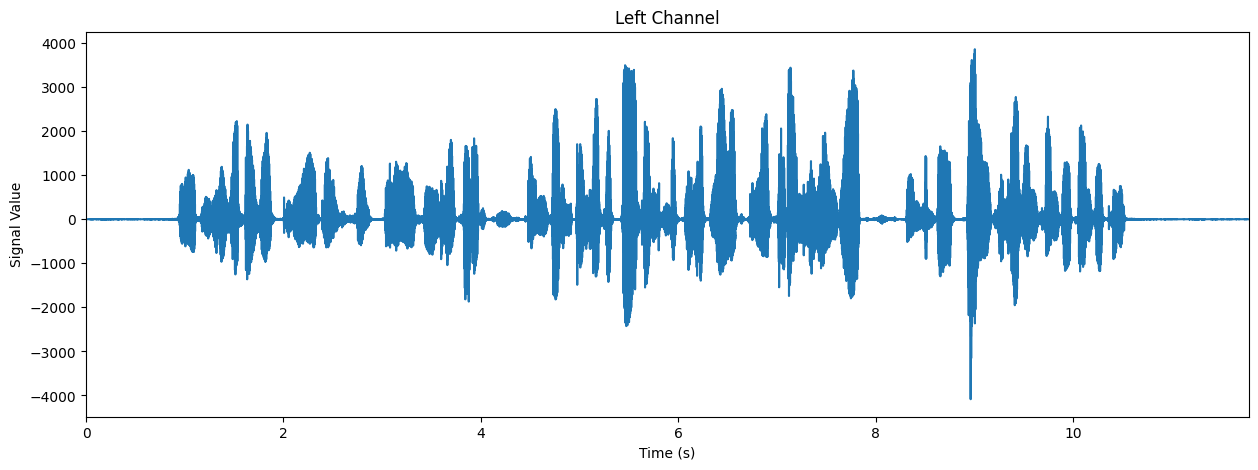

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(times, l_channel)
plt.title('Left Channel')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

In [84]:
import soundfile as sf

# Read in audio file
AUDIO_FILENAME = '/content/drive/MyDrive/Colab Notebooks/sip_lab2.wav'
data, sample_rate = sf.read(AUDIO_FILENAME)

# Calculate dB level
rms = np.sqrt(np.mean(data ** 2))
dB = 20 * np.log10(rms / 0.00002)

print("dB level:", dB)

dB level: 55.11349379317119


In [88]:
%pip install sounddevice

In [97]:
import sounddevice as sd
#play particular part of the audio
# Load the audio file
filename = '/content/drive/MyDrive/Colab Notebooks/sip_lab2.wav'
data, sample_rate = sf.read(filename)

# Set the start and end times (in seconds) of the section to play
start_time = 1
end_time = 10

# Compute the start and end samples
start_sample = int(start_time * sample_rate)
end_sample = int(end_time * sample_rate)

section_data = data[start_sample:end_sample]

# Play the section of audio data
sd.play(section_data, sample_rate)
sd.wait()  # Wait for the playback to complete

OSError: ignored

In [101]:
from pydub import AudioSegment
from pydub.playback import play

# Read in audio file
AUDIO_FILENAME = '/content/drive/MyDrive/Colab Notebooks/sip_lab2.wav'
audio = AudioSegment.from_wav(AUDIO_FILENAME)

# Define start and end times of segment to play
start_time = 5000  # in milliseconds
end_time = 10000  # in milliseconds

# Extract segment of audio to play
segment = audio[start_time:end_time]

# Play audio segment
play(segment)

In [76]:
%pip install playsound
import playsound as ps

  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7019 sha256=7039b8ad7a67d07997a49eb68827741c476b0eb8219491aef96c7a0a88c9bd1f
  Stored in directory: /root/.cache/pip/wheels/90/89/ed/2d643f4226fc8c7c9156fc28abd8051e2d2c0de37ae51ac45c
Successfully built playsound


In [78]:

# import required libraries
from pydub import AudioSegment
from pydub.playback import play

# Import an audio file
# Format parameter only
# for readability
wav_file = AudioSegment.from_file(file = '/content/drive/MyDrive/Colab Notebooks/sip_lab2.wav',
                                  format = "wav")

# Play the audio file
play(wav_file)

In [74]:
# import required libraries
from pydub import AudioSegment
from pydub.playback import play

# Import an audio file
# Format parameter only
# for readability
wav_file = AudioSegment.from_file(file = '/content/drive/MyDrive/Colab Notebooks/sip_lab2.wav',
                                  format = "wav")

# Play the audio file
play(wav_file)

In [65]:
%pip install vlc


ERROR: Could not find a version that satisfies the requirement vlc (from versions: none)
ERROR: No matching distribution found for vlc


In [67]:
import vlc
song = vlc.MediaPlayer('/content/drive/MyDrive/Colab Notebooks/sip_lab2.wav')
song.play()
song.set_time(10000)    # play at 10,000 ms (10 seconds)

ModuleNotFoundError: ignored